## - Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
housing = pd.read_csv('housing data.csv')
housing

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Informació columnes:

- 1.CRIM: Taxa de criminalitat per càpita per municipis
- 2.ZN: de sòl residencial zonificat per a lots de més de 25.000 metres quadrats.
- 3.INDUS: hectàrees comercials no minoristes per ciutat
- 4.CHAS: Charles River variable ficticia (= 1 si el tram limita el riu; 0 en cas contrari)
- 5.NOX: Concentració d'òxids nítrics(parts per 10 milions)
- 6.RM: nombre mitjà d'habitacions per habitatge
- 7.AGE: Proporció d'edat de les unitats de propietat construïdes abans de 1940
- 8.DIS: Distàncies ponderades fins a cinc centres d'ocupació de Boston
- 9.RAD: Índex d'accessibilitat a carreteres radials
- 10.TAX: Taxa d'impost sobre la propietat de valor total per 10.000 $
- 11.PTRATIO: Ràtio alumnes-professor per municipis
- 12.B: 1000(Bk - 0,63)^2 on Bk és la proporció de negres per ciutat
- 13.LSTAT: % d'estatus inferior de la població
- 14.MEDV: Valor mitjà de les cases ocupades pel propietari en 1.000 dòlars

Investiguem sobre el tipus de dades que conté el DataFrame:

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


Mirem si hi ha valors nulls, NaN i duplicats:

In [5]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
housing.duplicated().sum()

0

El resultat és que no n'hi ha.

Fem una gràfica de Pairplot per buscar correlacions entre variables:

<Figure size 720x720 with 0 Axes>

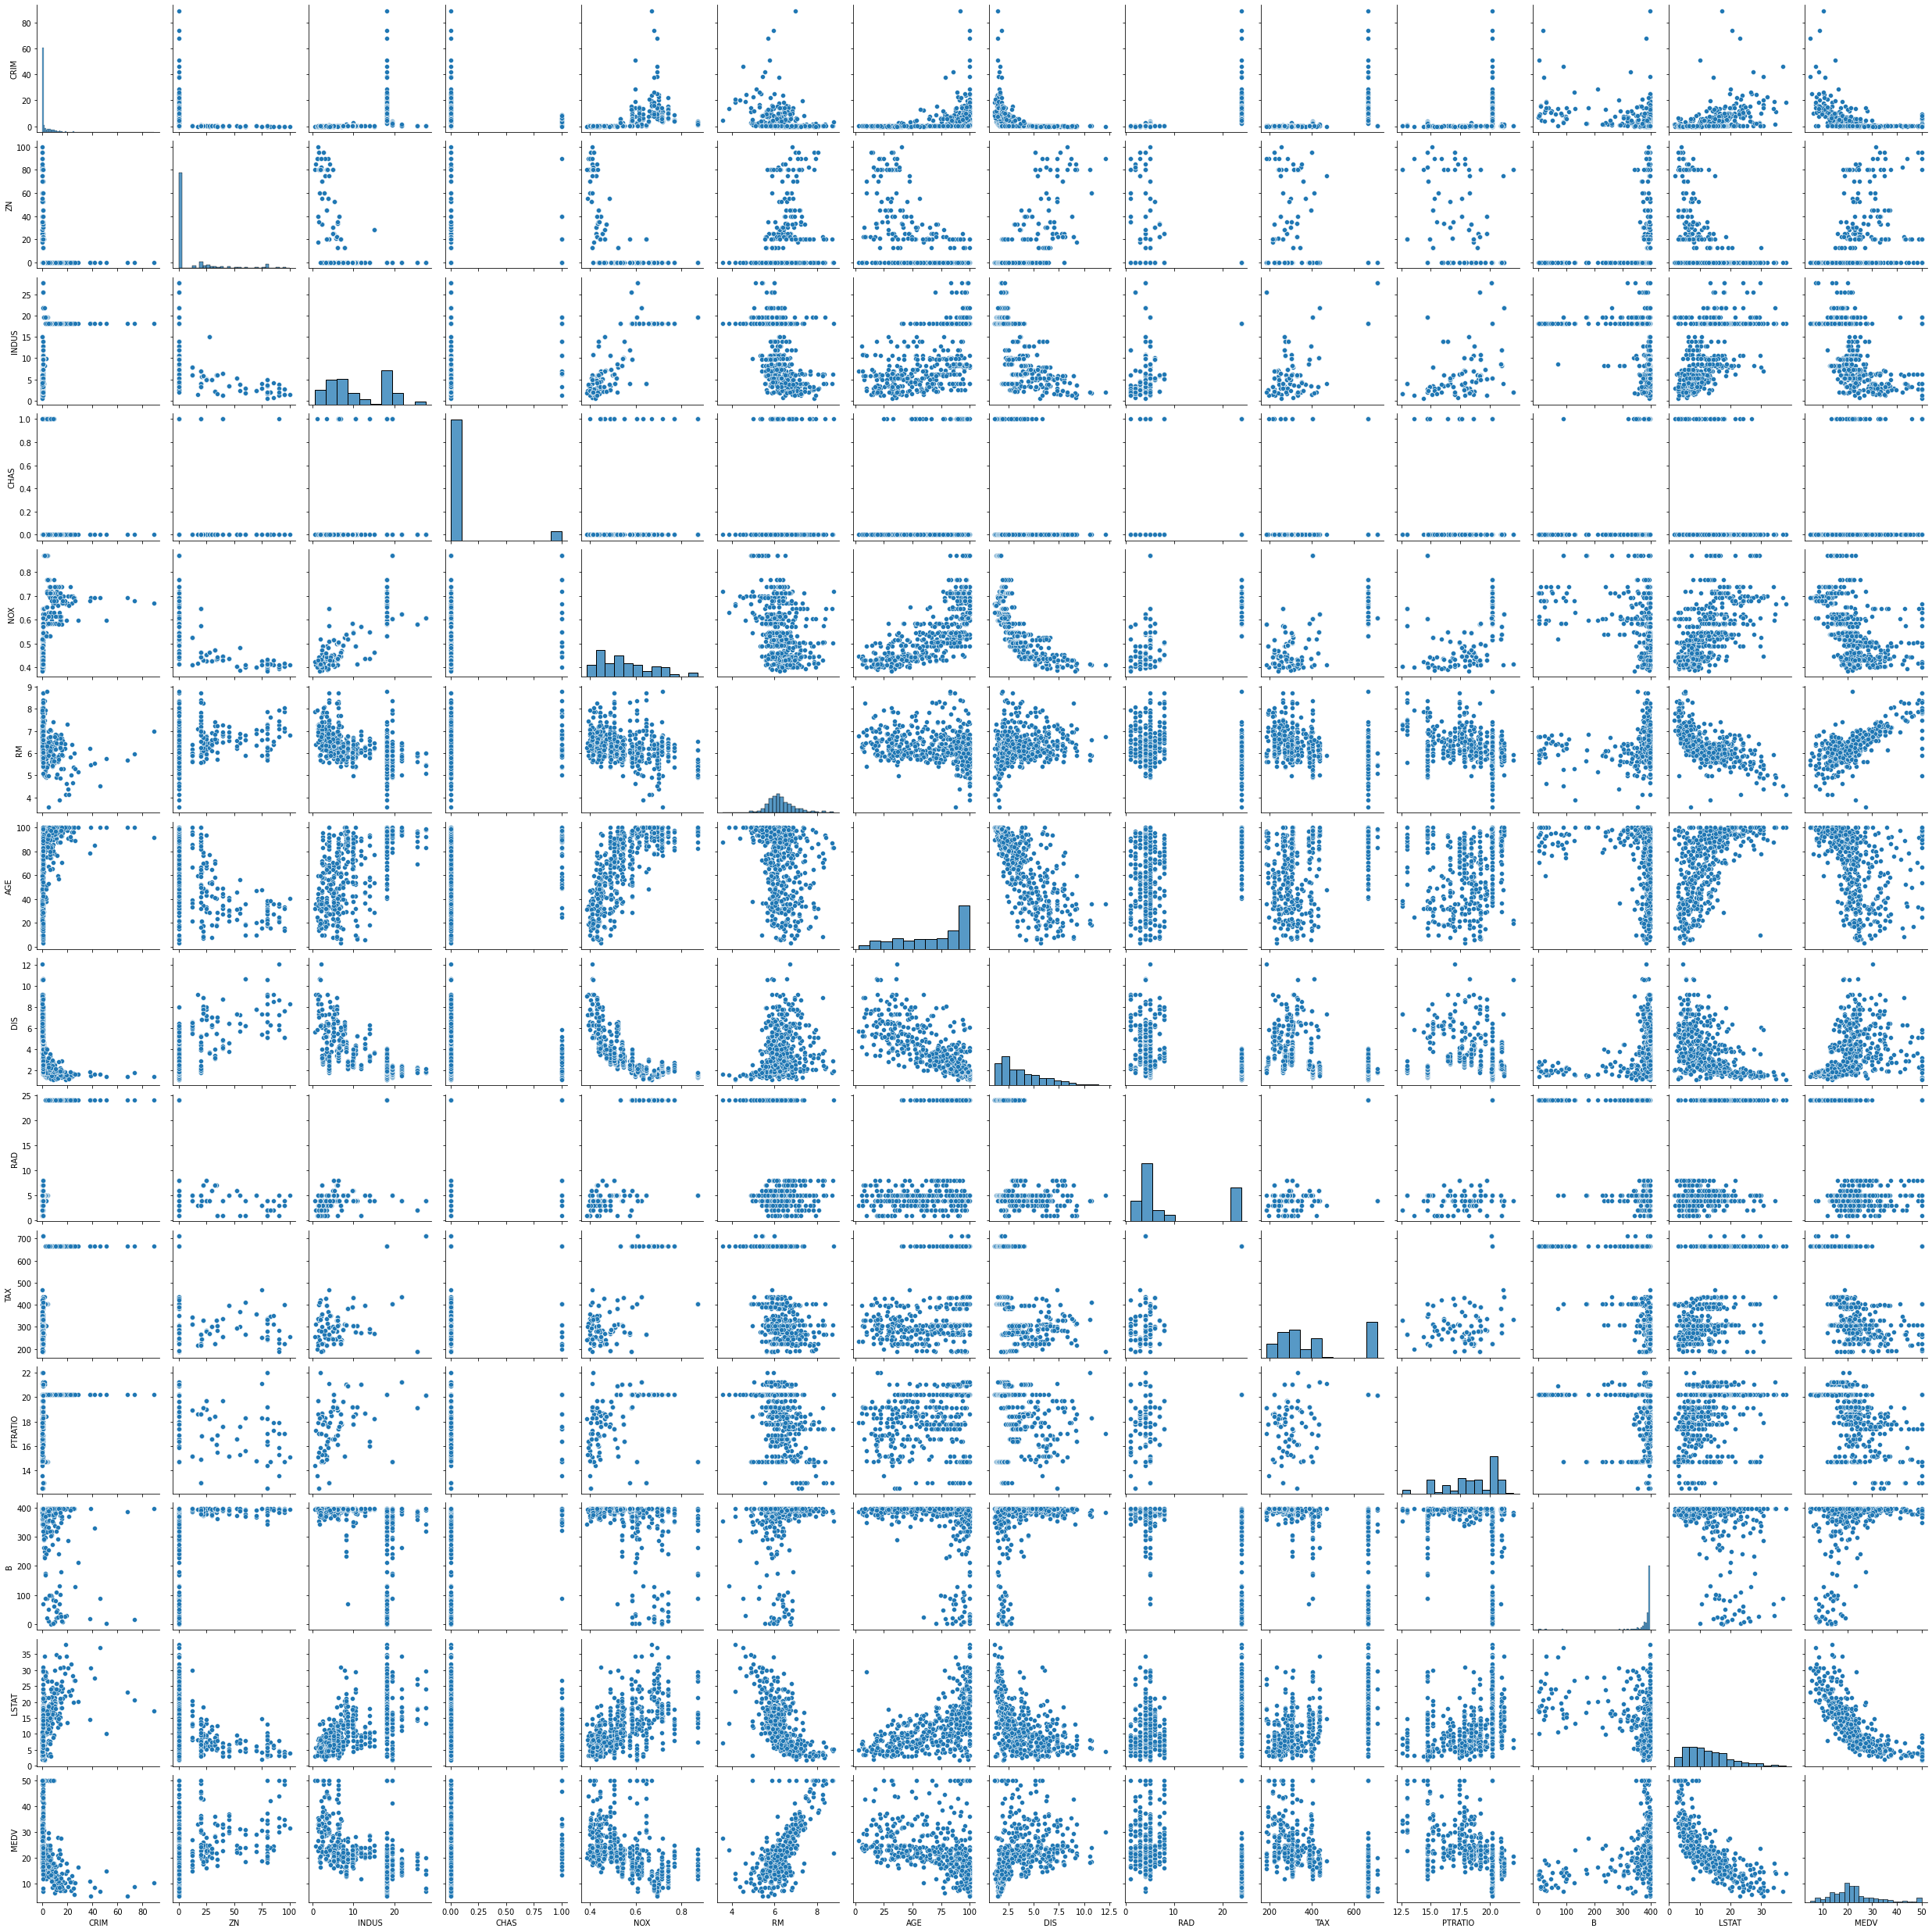

In [8]:
plt.figure(figsize=(10, 10))
sns.pairplot(housing)

MEDV - RM, MEDV -LSTAT **

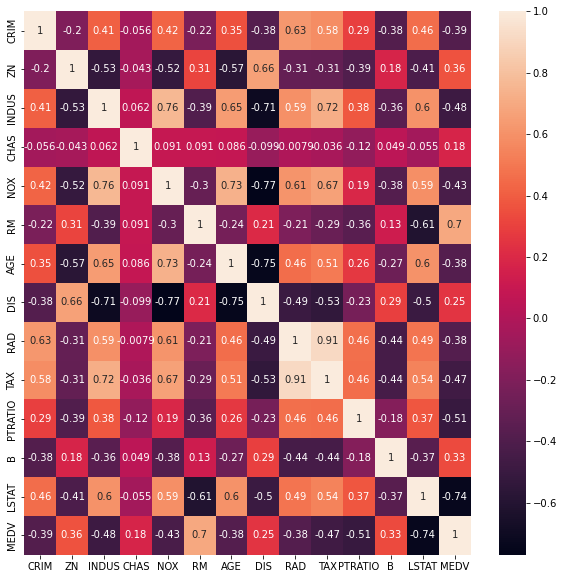

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(housing.corr(), annot=True)
plt.show()

Es podria destacar, per exemple: 
- Correlació negativa entre NOX i DIS indica menys contaminació al allunyar-se dels centres d'ocupació densament poblats.
- Correlació negativa Indus i Dis, indica que com més allunyades estan les vivendes dels centres d'ocupació, menys oferta comercial no minorista tenen.
- Correlació negativa Entre Age i Dis: les cases més antigues es troben més allunyades dels grans centres d'ocupació.
- Correlació positiva TAX i INDUS: com més a prop de les àrees comercials estiguin les vivendes, més taxes es paga.
- Correlació positiva NOX i INDUS: més contaminació, també, com més a prop de les àrees comercials.
- Correlació negativa L Stat i MEDV: a mesura que augmenta el percentatge de l'estatus inferior de la població el valor de les cases disminueix.
- Correlació positiva Entre RM i MEDV: el valor de les cases depèn molt del nombre mitjà d'habitacions. 

#### Per fer el preprocessat tindrem en compte el següent: 

- 1. Canviar variables categòriques a numèriques (one hot, dummy o enumeració(p.ex: notes alumnes)
- 2. Processar
  - 2.1 Si són gaussianes, Estandaritzar
  - 2.2 Si hi ha outliers, RobustScaler
  - 2.3 Si no n'hi ha, Normalitzar
 
- 3. Altres:
  - 3.1 Polimorfisme
  - 3.2 Power transform
  - 3.3 Cicliques, temporal

Comencem mirant si hi ha columnes categòriques que s'han de transformar. Ens trobem amb la de 'CHAS' que ja està dummificada i veiem que tenim la de 'RAD', que sí que caldria transformar en numèrica. Procedim a fer-ho:

In [10]:
housing = pd.get_dummies(housing, columns = ["RAD"])

In [11]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,222.0,18.7,...,28.7,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,...,22.4,1,0,0,0,0,0,0,0,0
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,...,20.6,1,0,0,0,0,0,0,0,0
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,...,23.9,1,0,0,0,0,0,0,0,0
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,...,22.0,1,0,0,0,0,0,0,0,0


Apliquem una funció amb test d'hipòtesi per determinar si les variables numèriques del DataFrame tenen una distribució normal. Mostrem, també una gràfica d'aquestes variables

In [12]:
from scipy.stats import shapiro

def comprovar_normalitat(df):
    normalitat = []
    for col in df.select_dtypes(include=['float64']).columns:
        p_valor = shapiro(df[col])[1]
        normalitat.append(p_valor > 0.05) 
    return normalitat

In [13]:
resultats = comprovar_normalitat(housing)
print(resultats)

[False, False, False, False, False, False, False, False, False, False, False, False]


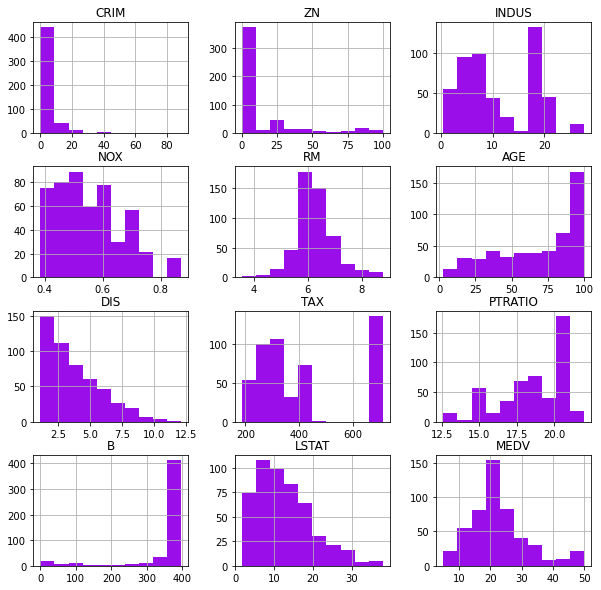

In [14]:

numeric_cols = housing.select_dtypes(include=['float64'])

numeric_cols.hist(bins=10, color='#9A0EEA', figsize=(10,10))
plt.show()

Viem que no tenen una distribució gaussiana, no es podria fer, per tant, una estandarització de les dades.

Ara mirem si hi ha outliers:

In [15]:
import matplotlib.pyplot as plt

def boxplots_per_columna(df):
    for col in df.select_dtypes(include=[float]).columns:
        df[[col]].boxplot()
        plt.show()

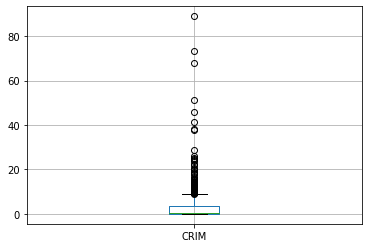

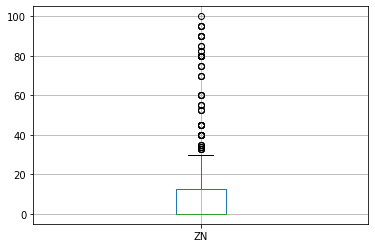

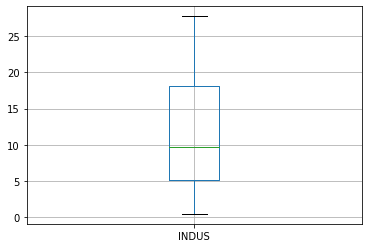

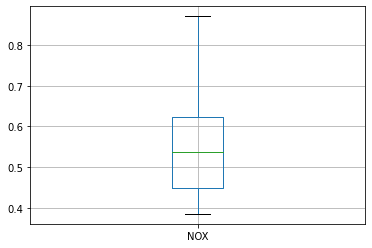

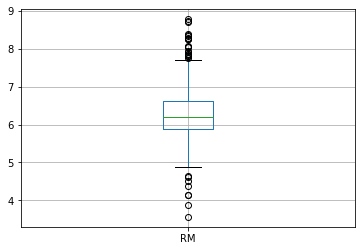

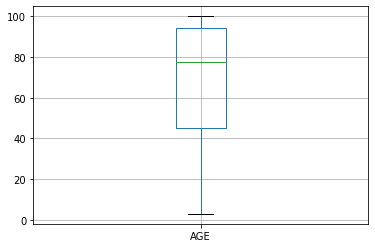

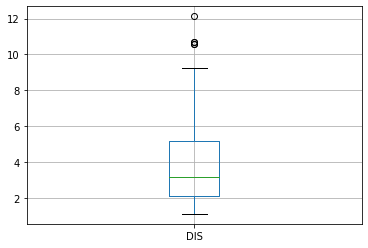

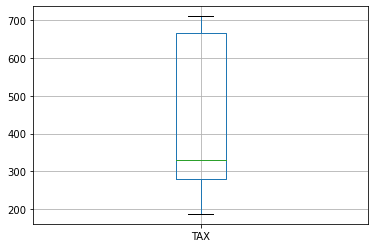

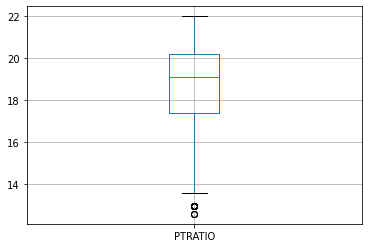

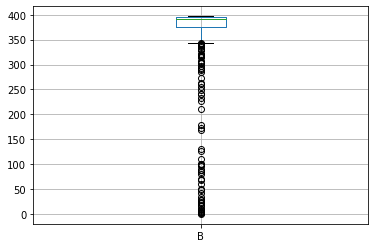

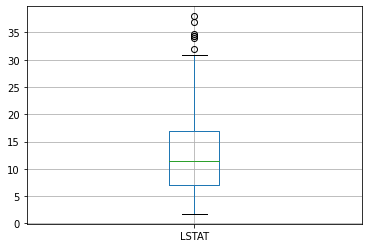

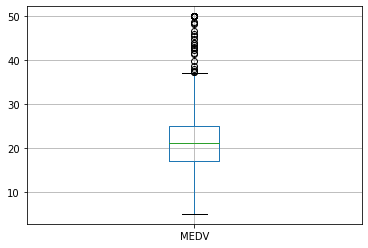

In [16]:
boxplots_per_columna(housing) 

Com a resultat trobem que les variables 'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT' i 'MEDV' tenen outliers. La variable 'MEDV', no obstant això, no la transformem perquè serà el target. Els que no tenen outliers són: 'INDUS','NOX','AGE' i 'TAX'. 

In [17]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4',
       'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24'],
      dtype='object')

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [19]:
columnsRobust = ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT']
scaler = preprocessing.RobustScaler().fit(housing[columnsRobust])
housing[columnsRobust] = scaler.transform(housing[columnsRobust])

columnsNorm = ['INDUS','NOX','AGE', 'TAX']
scaler = preprocessing.MinMaxScaler().fit(housing[columnsNorm])
housing[columnsNorm] = scaler.transform(housing[columnsNorm])

In [20]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.064471,0.0,0.242302,0.0,0.172840,0.287838,0.782698,0.568110,0.104962,-0.464286,...,21.6,0,1,0,0,0,0,0,0,0
1,-0.064477,0.0,0.242302,0.0,0.172840,1.320270,0.599382,0.568110,0.104962,-0.464286,...,34.7,0,1,0,0,0,0,0,0,0
2,-0.063064,0.0,0.063050,0.0,0.150206,1.067568,0.441813,0.920017,0.066794,-0.142857,...,33.4,0,0,1,0,0,0,0,0,0
3,-0.052864,0.0,0.063050,0.0,0.150206,1.268919,0.528321,0.920017,0.066794,-0.142857,...,36.2,0,0,1,0,0,0,0,0,0
4,-0.063765,0.0,0.063050,0.0,0.150206,0.300000,0.574665,0.920017,0.066794,-0.142857,...,28.7,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.054649,0.0,0.420455,0.0,0.386831,0.520270,0.681771,-0.231563,0.164122,0.678571,...,22.4,1,0,0,0,0,0,0,0,0
501,-0.059477,0.0,0.420455,0.0,0.386831,-0.118919,0.760041,-0.292972,0.164122,0.678571,...,20.6,1,0,0,0,0,0,0,0,0
502,-0.055169,0.0,0.420455,0.0,0.386831,1.037838,0.907312,-0.331534,0.164122,0.678571,...,23.9,1,0,0,0,0,0,0,0,0
503,-0.041591,0.0,0.420455,0.0,0.386831,0.791892,0.889804,-0.260388,0.164122,0.678571,...,22.0,1,0,0,0,0,0,0,0,0


#### Train/test

Separem el target, que serà la y (Valor mitjà de les cases ocupades pel propietari en 1.000 dòlars) de la resta del data set, que serà l'X.

In [21]:
from sklearn.model_selection import train_test_split
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4',
       'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']
X = housing[features]
y = housing['MEDV']

Separem el data set dos, una part que serà del 80% per fer l'entrenament i el 20% restant per fer el test.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Com podem veure el total dels registres de l'entrenament correspon al 80% del DataFrame i el 20% del dataframe corresponent a les columnes menys el target.

In [23]:
housing.shape

(505, 22)

In [24]:
X_train.shape

(404, 21)

In [25]:
X_test.shape

(101, 21)

In [26]:
y_train.shape

(404,)

In [27]:
y_test.shape

(101,)

Escollim el model de Regressió Lineal i Random Forest

#### Regresió Lineal

In [28]:
#importació model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [29]:
#entrenament
linreg.fit(X_train, y_train)

LinearRegression()

In [30]:
#predicció
y_pred_linreg = linreg.predict(X_test)

In [31]:
#10 resultats de predicció
y_pred_linreg[1:10]

array([32.84853649, 19.12782533, 27.82653137, 19.07595715, 19.64613038,
       20.80289689, 11.7943451 , 34.89905358, 24.32780923])

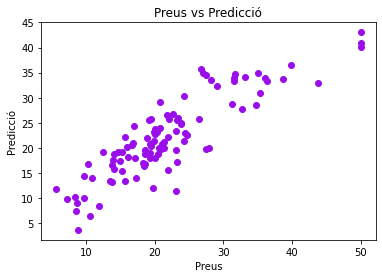

In [32]:
plt.scatter(y_test, y_pred_linreg, color='#9A0EEA')  
plt.xlabel('Preus')  
plt.ylabel('Predicció') 
plt.title('Preus vs Predicció') 
plt.show()

A la gràfica a l'eix x es posen els preus reals i a l'eix y, els de la predicció. Com més a prop de la diagonal estiguin els punts, millor és la predicció. Veient la gràfica es pot dir que sembla bastant bona

#### Random forest

In [33]:
#importació model
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor()

In [34]:
#entrenament
ranfor.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
#predir
y_pred_ranfor = ranfor.predict(X_test) 
y_pred_ranfor[:10]

array([22.92 , 44.565, 14.553, 33.014, 13.889, 21.067, 21.687,  9.095,
       25.307, 17.886])

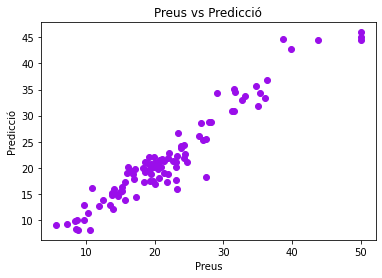

In [36]:
plt.scatter(y_test, y_pred_ranfor, color='#9A0EEA')  
plt.xlabel('Preus')  
plt.ylabel('Predicció') 
plt.title('Preus vs Predicció') 
plt.show()

Els punts d'aquesta gràfica de dispersió també semblen estar bastant en diagonal i sembla una bona predicció. A continuació avaluarem la qualitat de predicció amb mètodes específics.

## - Exercici 2
Compara’ls en base al MSE i al R2.

In [37]:
from sklearn.metrics import r2_score

r2_linreg = r2_score(y_test, y_pred_linreg)
r2_ranfor = r2_score(y_test, y_pred_ranfor)

In [38]:
from sklearn.metrics import mean_squared_error

mse_linreg = mean_squared_error(y_test, y_pred_linreg)
mse_ranfor = mean_squared_error(y_test, y_pred_ranfor)

In [39]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_linreg, mse_linreg],
                                  ['Random Forest', r2_ranfor, mse_ranfor]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.762306,19.677168
1,Random Forest,0.921675,6.484043


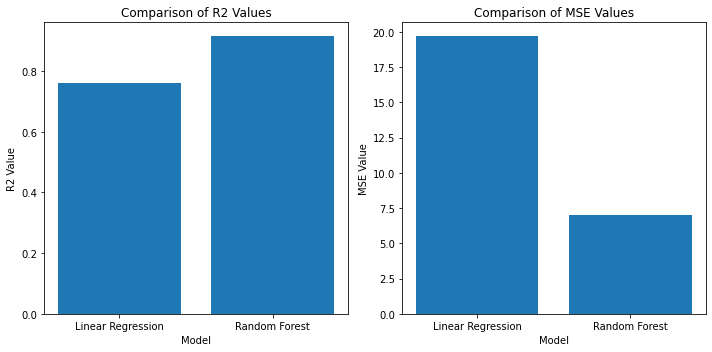

In [40]:
metrics = pd.DataFrame(data = [['Linear Regression', 0.762306, 19.677168],
                               ['Random Forest', 0.915130, 7.025874]],
                       columns = ['Model', 'R2', 'MSE'])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(metrics['Model'], metrics['R2'])
axs[0].set_title('Comparison of R2 Values')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('R2 Value')

axs[1].bar(metrics['Model'], metrics['MSE'])
axs[1].set_title('Comparison of MSE Values')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MSE Value')
plt.tight_layout()
plt.show()

R2 o coeficient de determinació és una mètrica que avalua el rendiment del model. Un valor de R² proper a 1 indica que el model representa bé la variància de les dades, mentre que un valor proper a 0 indica que el model no ho fa. En el cas de la regressió lineal un 0.76 seria força bon resultat.  

El MSE, que mesura la mitjana dels errors quadrats entre les prediccions del model i els valors reals de la variable dependent. Com més petit sigui, millor. En aquest cas és de 19,67.

Pel que fa al model de Random Forest, el R2 és molt alt, del 91,4%. Es tracta de una molt bona representació de la variancia de dades però també és possible que ens trobem davant d'un overfitting.
El MSE és més baix, de 6,76, i per tant podem dir que el model de Random Forest ens serveix millor en aquest cas.

## - Exercici 3
Entrena’ls utilitzant els diferents parametres que admeten per intentar millorar-ne la predicció.

In [41]:
#busquem els noms i valors dels paràmetres 
linreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
#definim parametres i modifiquem els possibles valors
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [44]:
grid_search = GridSearchCV(linreg, param_grid, cv=5, n_jobs=-1)

In [45]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [46]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best score:  0.3282477162108272


Repetim la regressió amb els paràmetres que se'ns indica i analitzem el resultat:

In [47]:
linreg_hp = LinearRegression()
linreg_hp.fit(X_train, y_train)
y_pred_linreghp = linreg_hp.predict(X_test)
y_pred_linreghp[1:10]
r2_linreghp = r2_score(y_test, y_pred_linreghp)
mse_linreghp = mean_squared_error(y_test, y_pred_linreghp)

In [48]:
r2_linreghp

0.7623056953314545

In [49]:
mse_linreghp

19.677168253061055

Veiem que la predicció no ha millorat, ja que no hem hagut de canviar els paràmetres.

Ara obtenim els parametres del model Random Forest

In [50]:
ranfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Els modifiquem:

In [51]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("Puntuación de validación cruzada:", grid_search.best_score_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Puntuación de validación cruzada: 0.8519717864072496


Repetim el model indicant els paramtres

In [52]:
ranfor_hp = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=150)
ranfor_hp.fit(X_train, y_train)
y_pred_ranforhp = ranfor_hp.predict(X_test)
y_pred_ranforhp[1:10]

array([40.25084127, 16.02368889, 31.12865205, 13.4020399 , 20.5129768 ,
       21.60806059,  8.98439656, 26.3954057 , 19.17656742])

In [53]:
r2_ranforhp = r2_score(y_test, y_pred_ranforhp)
mse_ranforhp = mean_squared_error(y_test, y_pred_ranforhp)

In [54]:
r2_ranforhp

0.8950249538540751

In [55]:
mse_ranforhp

8.690202519856843

In [56]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_linreg, mse_linreg, r2_linreghp, mse_linreghp],
                                ['Random Forest', r2_ranfor, mse_ranfor, r2_ranforhp, mse_ranforhp]],
                       columns = ['Model', 'R2', 'MSE', 'Tuned R2', 'Tuned MSE'])
metrics.head()

,Model,R2,MSE,Tuned R2,Tuned MSE
0,Linear Regression,0.762306,19.677168,0.762306,19.677168
1,Random Forest,0.921675,6.484043,0.895025,8.690203


En aquest cas tunejar els paràmetres del model Random Forest tampoc ha millorat els resultats, és més, els ha empitjorat lleugerament. Els paràmetres predeterminats, en aquest cas, eren els que millors resultats han aportat. 

## - Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).



In [57]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linreg, X, y, cv=5)
print(cv_scores)

[ 0.61744952  0.73871671  0.55604743  0.08267432 -0.3536494 ]


In [58]:
print('Promig 5-Fold CV Score: {}'. format(np.mean(cv_scores)))

Promig 5-Fold CV Score: 0.3282477162108267


In [59]:
cv_scores_r = cross_val_score(ranfor, X, y, cv=5)
print(cv_scores)

[ 0.61744952  0.73871671  0.55604743  0.08267432 -0.3536494 ]


In [60]:
print('Promig 5-Fold CV Score: {}'. format(np.mean(cv_scores_r)))

Promig 5-Fold CV Score: 0.6310883234907151


Com a valoració, dir que la validació del models ens indica que el Random Forest fa un millor exercici, ja que la puntuació de 0.63 és més alta. Com més alta sigui la puntuació, millors prediccions fa el model. El de la Regressió Lineal, en aquest cas de mitjana 0.32, és una puntuació baixa i indica que el model necessitaria millores.

## - Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [61]:
housing2 = housing.copy()

In [62]:
housing2.drop(['RM'], axis=1, inplace=True)

In [63]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   AGE      505 non-null    float64
 6   DIS      505 non-null    float64
 7   TAX      505 non-null    float64
 8   PTRATIO  505 non-null    float64
 9   B        505 non-null    float64
 10  LSTAT    505 non-null    float64
 11  MEDV     505 non-null    float64
 12  RAD_1    505 non-null    uint8  
 13  RAD_2    505 non-null    uint8  
 14  RAD_3    505 non-null    uint8  
 15  RAD_4    505 non-null    uint8  
 16  RAD_5    505 non-null    uint8  
 17  RAD_6    505 non-null    uint8  
 18  RAD_7    505 non-null    uint8  
 19  RAD_8    505 non-null    uint8  
 20  RAD_24   505 non-null    uint8  
dtypes: float64(12), 

In [64]:
from sklearn.model_selection import train_test_split
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4',
       'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']
X = housing2[features]
y = housing2['MEDV']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Regressió lineal

In [66]:
linreg = LinearRegression()

In [67]:
linreg.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred_linreg = linreg.predict(X_test)

In [69]:
y_pred_linreg[:10]

array([26.80783267, 29.14853062, 18.9190016 , 26.46715738, 17.62923211,
       20.26595816, 20.66575631, 10.21578564, 37.69594504, 24.68151497])

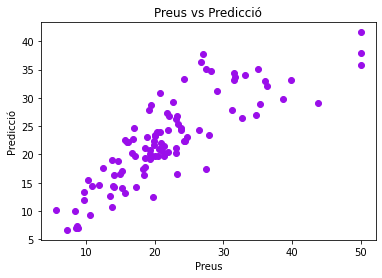

In [70]:
plt.scatter(y_test, y_pred_linreg, color='#9A0EEA')  
plt.xlabel('Preus')  
plt.ylabel('Predicció') 
plt.title('Preus vs Predicció') 
plt.show()

#### Random forest

In [71]:
ranfor = RandomForestRegressor()

In [72]:
ranfor.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
y_pred_ranfor = ranfor.predict(X_test) 
y_pred_ranfor[:10]

array([23.805, 37.507, 14.703, 27.777, 13.354, 22.723, 21.233,  9.212,
       36.254, 17.388])

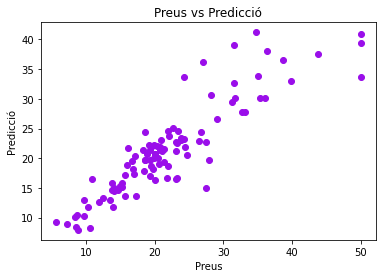

In [74]:
plt.scatter(y_test, y_pred_ranfor, color='#9A0EEA')  
plt.xlabel('Preus')  
plt.ylabel('Predicció') 
plt.title('Preus vs Predicció') 
plt.show()

In [75]:
r2_linreg = r2_score(y_test, y_pred_linreg)
r2_ranfor = r2_score(y_test, y_pred_ranfor)

In [76]:
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
mse_ranfor = mean_squared_error(y_test, y_pred_ranfor)

In [77]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_linreg, mse_linreg],
                                  ['Random Forest', r2_ranfor, mse_ranfor]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.head()

,Model,R2,MSE
0,Linear Regression,0.696652,25.112245
1,Random Forest,0.799808,16.572585


#### Modificar paràmetres

In [78]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [79]:
grid_search = GridSearchCV(linreg, param_grid, cv=5, n_jobs=-1)

In [80]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [81]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best score:  0.4763251747429197


In [82]:
linreg_hp = LinearRegression()
linreg_hp.fit(X_train, y_train)
y_pred_linreghp = linreg_hp.predict(X_test)
y_pred_linreghp[1:10]
r2_linreghp = r2_score(y_test, y_pred_linreghp)
mse_linreghp = mean_squared_error(y_test, y_pred_linreghp)

In [83]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("Puntuación de validación cruzada:", grid_search.best_score_)

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Puntuación de validación cruzada: 0.7989699865587434


In [84]:
ranfor_hp = RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=150)
ranfor_hp.fit(X_train, y_train)
y_pred_ranforhp = ranfor_hp.predict(X_test)
y_pred_ranforhp[1:10]

array([34.47791111, 16.30653333, 27.08109722, 14.34727778, 21.61995556,
       20.55292588,  8.27266667, 31.7926    , 19.74983333])

In [85]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_linreg, mse_linreg, r2_linreghp, mse_linreghp],
                                ['Random Forest', r2_ranfor, mse_ranfor, r2_ranforhp, mse_ranforhp]],
                       columns = ['Model', 'R2', 'MSE', 'Tuned R2', 'Tuned MSE'])
metrics.head()

,Model,R2,MSE,Tuned R2,Tuned MSE
0,Linear Regression,0.696652,25.112245,0.696652,25.112245
1,Random Forest,0.799808,16.572585,0.895025,8.690203


Aquí sí que millora el model de Random Forest a l'hora de tunejar els parametres.

#### Cross validation

In [86]:
from sklearn.model_selection import cross_val_score
cv_scores2 = cross_val_score(linreg, X, y, cv=5)
print(cv_scores2)

[0.42749381 0.65757359 0.40026522 0.54366343 0.35262981]


In [87]:
print('Promig 5-Fold CV Score: {}'. format(np.mean(cv_scores2)))

Promig 5-Fold CV Score: 0.47632517474292013


In [88]:
cv_scores_r2 = cross_val_score(ranfor, X, y, cv=5)
print(cv_scores_r2)

[0.65631217 0.84486753 0.44222455 0.64942836 0.38998221]


In [89]:
print('Promig 5-Fold CV Score: {}'. format(np.mean(cv_scores_r2)))

Promig 5-Fold CV Score: 0.5965629642472899


In [90]:
linreg_housing_promig_mean_cv = np.mean(cv_scores)
randfor_housing_promig_mean_cv_r = np.mean(cv_scores_r)
linreg_housing_without_RM_promig_mean_cv2 = np.mean(cv_scores2)
randfor_housing_without_RM_mean_cv_r2 = np.mean(cv_scores_r2)


data = {'Model': ['Linear Regression Housing Promig',
                  'Random Forest Housing Promig',
                  'Linear Regression Housing without RM Promig',
                  'Random Forest Housing without RM Promig'],
        'CV Score Mean': [linreg_housing_promig_mean_cv,
                          randfor_housing_promig_mean_cv_r,
                          linreg_housing_without_RM_promig_mean_cv2,
                          randfor_housing_without_RM_mean_cv_r2]}

df = pd.DataFrame(data)
df

,Model,CV Score Mean
0,Linear Regression Housing Promig,0.328248
1,Random Forest Housing Promig,0.631088
2,Linear Regression Housing without RM Promig,0.476325
3,Random Forest Housing without RM Promig,0.596563


Podem apreciar que en el cas de la regressió lineal el model ha millorat lleugerament, mentre que en el cas del Random Forest ha empitjorat és millorable. Es pot dir que la variable RM afecta al resultat de la predicció, ja que el nombre mitjà d'habitacions en un habitatge està molt relacionat amb el preu d'aquest.